In [1]:
#Importing libraries
import os
from pathlib import Path
import torch
from torchvision import transforms, datasets
from torch import nn


In [2]:
torch.__version__

'2.0.0+cpu'

In [3]:
#Setting up device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("/kaggle/working")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find /kaggle/working/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [5]:
def walk_through_dir(dir_path):
    '''
    Walks through dir_path and Returns calculates the number of files, directory
    Returns: Prints total No. of files and Directory in a dir_path
    '''
    
    for dir_path, dir_names, files_names in os.walk(dir_path):
        print(f"Path: {dir_path}\nTotal Directories count: {len(dir_names)}\nTotal Files count: {len(files_names)}\n********************\n")
    print("Exiting walk_through dir")
    

# image_path = "/kaggle/input/intel-image-classification"
image_path = '/kaggle/working/pizza_steak_sushi'
image_path = Path(image_path)
walk_through_dir(image_path)

Path: /kaggle/working/pizza_steak_sushi
Total Directories count: 2
Total Files count: 0
********************

Path: /kaggle/working/pizza_steak_sushi/train
Total Directories count: 3
Total Files count: 0
********************

Path: /kaggle/working/pizza_steak_sushi/train/pizza
Total Directories count: 0
Total Files count: 78
********************

Path: /kaggle/working/pizza_steak_sushi/train/sushi
Total Directories count: 0
Total Files count: 72
********************

Path: /kaggle/working/pizza_steak_sushi/train/steak
Total Directories count: 0
Total Files count: 75
********************

Path: /kaggle/working/pizza_steak_sushi/test
Total Directories count: 3
Total Files count: 0
********************

Path: /kaggle/working/pizza_steak_sushi/test/pizza
Total Directories count: 0
Total Files count: 25
********************

Path: /kaggle/working/pizza_steak_sushi/test/sushi
Total Directories count: 0
Total Files count: 31
********************

Path: /kaggle/working/pizza_steak_sushi/test/s

In [6]:
# Defining directories path
train_dir = image_path  / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/kaggle/working/pizza_steak_sushi/train'),
 PosixPath('/kaggle/working/pizza_steak_sushi/test'))

In [17]:
# Get images path for training and testing of model

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:9]

[PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/3699992.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/1968947.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/1089334.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/786995.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/1524655.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/1033251.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/2800325.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/3530210.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/218711.jpg')]

In [20]:
# Get images path for training and testing of model

image_path_list = list(image_path.glob("*/*/*.jpg"))
type(image_path_list), len(image_path_list)

(list, 300)

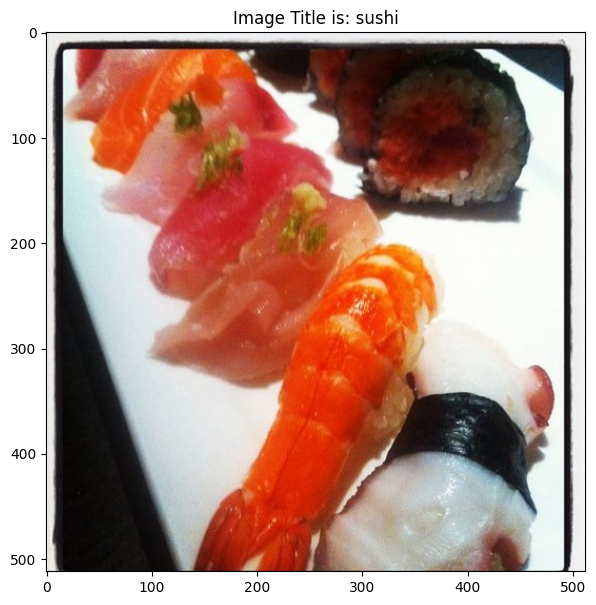

In [21]:
# See image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
index = 85
single_image_path = image_path_list[index]


def show_image(image_path):
    
#     takeout image values from the path
#     we have to convert the image to a NumPy array first.
    img = Image.open(image_path)
    img = np.asarray(img)
    
    image_class = single_image_path.parent.stem # Extract the name of the directory where image is placed 
    
    plt.figure(figsize = (10,7))
    plt.imshow(img)
    plt.title(f"Image Title is: {image_class}")
#     plt.show

show_image(single_image_path)
    

In [23]:
single_image_path = image_path_list[1]
img_pil = Image.open(single_image_path)
img = np.asarray(img_pil)
image_path_list[1],type(img), img.shape, img_pil

(PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/1968947.jpg'),
 numpy.ndarray,
 (512, 512, 3),
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>)

In [24]:
# Perform transformation on image to make model hard to learn 
data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.7), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
    ])

In [25]:
image_path_list[0:2]

[PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/3699992.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/1968947.jpg')]

Function Exit


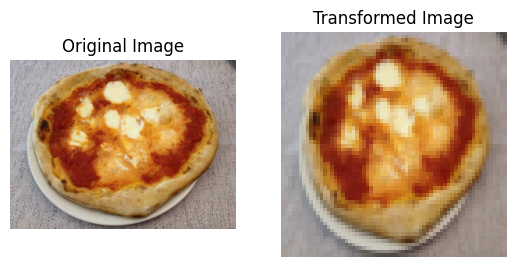

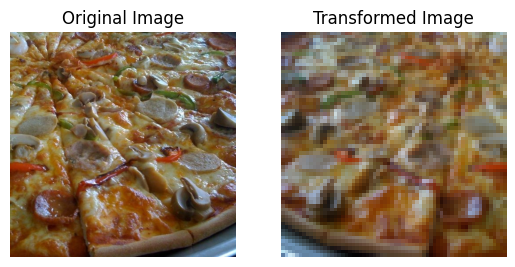

In [26]:
# Now we've got a composition of transforms, 
# let's write a function to try them out on various images
def plot_transformed_images(image_path_list, transform):
    
    for image_path in image_path_list[0:2]:
        
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title("Original Image")
            ax[0].axis("off")
            
            
            ax[1].imshow(data_transform(f).permute(1,2,0))
            ax[1].set_title("Transformed Image")
            ax[1].axis("off")
    print("Function Exit")
    
plot_transformed_images(image_path_list, transform=data_transform)
            

In [28]:
# Defining directories path
train_dir = image_path  / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/kaggle/working/pizza_steak_sushi/train'),
 PosixPath('/kaggle/working/pizza_steak_sushi/test'))

In [29]:
# train_dir = PosixPath('/kaggle/working/pizza_steak_sushi/train')

train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)
test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: /kaggle/working/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.7)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: /kaggle/working/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.7)
               ToTensor()
           )


In [30]:
# Get class names as a list
class_name = train_data.classes
print(f"Class Names: {class_name}")

class_dic = train_data.class_to_idx
print(f"Class and label: {class_dic}")

Class Names: ['pizza', 'steak', 'sushi']
Class and label: {'pizza': 0, 'steak': 1, 'sushi': 2}


In [31]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

# Method # 2

### Writing Custome Class

In [35]:
label = []
for entry in os.scandir(train_dir) :
    if entry.is_dir():
        print(entry)
        label.append(entry.name)
label

<DirEntry 'pizza'>
<DirEntry 'sushi'>
<DirEntry 'steak'>


['pizza', 'sushi', 'steak']

In [36]:
list(Path(train_dir).glob("*/*.jpg"))[0], list(Path(train_dir).glob("*/*.jpg"))[0].parent, list(Path(train_dir).glob("*/*.jpg"))[0].parent.name

(PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza/3699992.jpg'),
 PosixPath('/kaggle/working/pizza_steak_sushi/train/pizza'),
 'pizza')

In [37]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    
    def __init__(self, target_path, transform=None):
        
        self.paths = list(Path(target_path).glob("*/*.jpg"))
        self.transform = transform
        
#       Get the class names using os.scandir() to traverse a target directory
        self.classes = sorted(entry.name for entry in os.scandir(target_path) if entry.is_dir())
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}

    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, index):
        
        classname = self.paths[index].parent.name
        
        if self.transform:
            return self.transform(Image.open(self.paths[index])), class_idx # return data, label (X, y)
        else:
            return ( Image.open(self.paths[index]) , self.class_to_idx[class_name])
         

In [38]:
train_custom_dataset = ImageFolderCustom(target_path=train_dir, transform=data_transform )
test_custom_dataset = ImageFolderCustom(target_path=test_dir, transform=data_transform )

train_custom_dataset, test_custom_dataset

(<__main__.ImageFolderCustom at 0x7ffabc265ff0>,
 <__main__.ImageFolderCustom at 0x7ffadf6631f0>)

In [39]:
len(train_custom_dataset), len(test_custom_dataset), train_custom_dataset.class_to_idx, train_custom_dataset.classes

(225, 75, {'pizza': 0, 'steak': 1, 'sushi': 2}, ['pizza', 'steak', 'sushi'])